In [2]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [9]:
batch_size = 128
num_classes = 10
epochs = 5


In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 394us/step - loss: 0.1002 - acc: 0.9702 - val_loss: 0.0835 - val_acc: 0.9760
Epoch 2/5
60000/60000 [==============================] - 22s 367us/step - loss: 0.0737 - acc: 0.9784 - val_loss: 0.0766 - val_acc: 0.9772
Epoch 3/5
60000/60000 [==============================] - 24s 397us/step - loss: 0.0589 - acc: 0.9823 - val_loss: 0.0765 - val_acc: 0.9810
Epoch 4/5
60000/60000 [==============================] - 25s 422us/step - loss: 0.0495 - acc: 0.9849 - val_loss: 0.0799 - val_acc: 0.9802
Epoch 5/5
60000/60000 [==============================] - 25s 411us/step - loss: 0.0445 - acc: 0.9868 - val_loss: 0.0826 - val_acc: 0.9825
Test loss: 0.0826363930205
Test accuracy: 0.9825


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

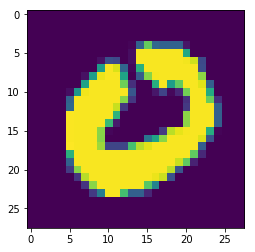

In [18]:
plt.imshow(np.reshape(x_test[25], (28,28)))


In [19]:
np.argmax(y_test[25])

0

In [16]:
predictions = model.predict(x_test, batch_size=32)

In [20]:
np.argmax(predictions[25])

0